## Проект: "выявляем определяющие успешность игры закономерности"

Описание таблицы:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

##### Шаг 0. Загрузим библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

##### Шаг 1. Откроем файл с данными и изучим общую информацию

In [2]:
all_sales = pd.read_csv('/datasets/games.csv')
all_sales.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12128,Microsoft Flight Simulator 2004: A Century of ...,PC,2003.0,Simulation,0.00,0.06,0.00,0.01,88.0,8.2,E
318,Nintendogs + cats,3DS,2011.0,Simulation,1.44,1.41,0.73,0.27,NaN,NaN,NaN
14651,New Tokyo Legacy: Operation Babel,PSV,2015.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
11935,Cho~ricchi! Tamagotchi no Puchi Puchi Omisecchi,3DS,2012.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
15788,World Class Rugby 2: Kokunai Gekitou Hen '93,SNES,1994.0,Sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN


In [3]:
all_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
print(all_sales.Platform.unique())
print('_________________________')
print(all_sales.Genre.unique())
print('_________________________')
print(all_sales.Rating.unique())
print('_________________________')
print(all_sales.User_Score.unique())
print('_________________________')
print(all_sales.Critic_Score.unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
_________________________
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
_________________________
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
_________________________
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9

In [5]:
all_sales[all_sales['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [6]:
all_sales[all_sales['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


##### Вывод по шагу:
* Названия колонок для удобства нужно привести к нижнему регистру
* В столбце Year_of_Release отсутсвует 1.6% данных. Не похоже что это только старые игры с неизвестной датой, так как есть достаточно новые платформы. Можно было бы заполнить средним годом по платформе, но с учётом небольшого кол-ва данных, считаю их можно удалить.
* Столбцы Year_of_Release, Critic_Score преобразовать в int
* 2 игры не имеют названия и части прочих атрибутов - от них можно избавиться.
* TBD в User Score означает to be determined - то есть ещё не присвоен, обоснованным тут будет заменить tbd на NAN, так как фактически оценки ещё нет, а столбец преобразовать во float
* Столбец Rating и Critic Score не заполнить ни средней ни медианой, тут всё очень индивидуально. Придётся оставить NaN, или избавиться от значений (определимся по ходу проекта).

##### Шаг 2. Подготовим данные

In [7]:
# приведем столбцы к нижнему регистру

def col_lower(df):
    col = df.columns
    renamed = {k:k.lower() for k in col}
    df = df.rename(columns = renamed)
    return df

all_sales = col_lower(all_sales)
all_sales.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
# В столбце Year_of_Release отсутсвует 1.6% данных. Не похоже что это только старые игры с неизвестной датой,
# так как есть достаточно новые платформы. Можно было бы заполнить средним годом по платформе,
# но с учётом небольшого кол-ва данных, считаю их можно удалить.
# Возможная причина появления пропусков - человеческий фактор, когда год при заполнении был пропущен

all_sales.dropna(subset = ['year_of_release'],inplace = True)

In [9]:
# переведём столбец в  int
all_sales['year_of_release'] = all_sales['year_of_release'].astype(int)

In [10]:
# ещё избавимся от 2х игр без названия и жанра. Похоже это достаточно старые игры по которым просто не информации
all_sales.dropna(subset = ['name'],inplace = True)

In [11]:
# tbd в user score заменим на Nan, чтобы не мешал расчётам. 
# TBD в User Score означает to be determined - то есть ещё не присвоен, обоснованным тут будет заменить tbd на NAN,
# так как фактически оценки ещё нет. NaN в остальных оценках скорее всего также результат того, что оценка просто отсутствует

all_sales['user_score'] = all_sales['user_score'].replace('tbd',np.nan)

# и преобразуем во float:
all_sales['user_score'] = all_sales['user_score'].astype(float)


In [12]:
# теперь посчитаем итог из продаж по регионам
all_sales['total_sales'] =  (all_sales['na_sales'] + all_sales['eu_sales'] + all_sales['jp_sales'] + all_sales['other_sales'])

#### Шаг 3. Проведем исследовательский анализ данных

In [13]:
# сгруппируем данные по годам
grouped_year = (all_sales.pivot_table(index = 'year_of_release', aggfunc = {'name':'count'})
                        .rename(columns = {'name':'count'})
                        .sort_values(by = 'count'))


Text(0.5, 1.0, 'выпуск игр по годам')

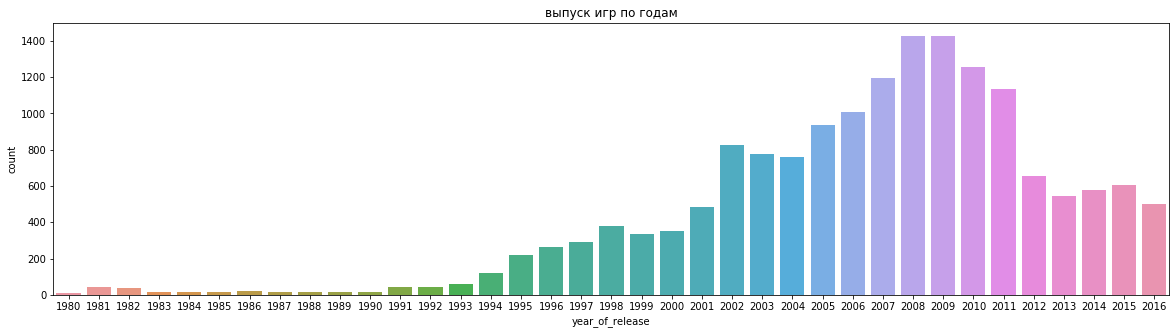

In [14]:
plt.figure(figsize=(20,5))
sns.barplot(x=grouped_year.index,y='count', data = grouped_year ).set_title('выпуск игр по годам')

исходя из количества выпущенных игр, можно сделать вывод, что наибольшие значения с 2005 по 2011 год. В 80 и 90 выпускалось незначительное кол-во игр, как и с 2012 г

In [15]:
grouped_year = (all_sales.pivot_table(index = 'year_of_release', aggfunc = {'total_sales':'sum'})
                                                                .rename(columns = {'total_sales':'sum'})
                                                                .sort_values(by = 'sum'))

Text(0.5, 1.0, 'продажи игр по годам')

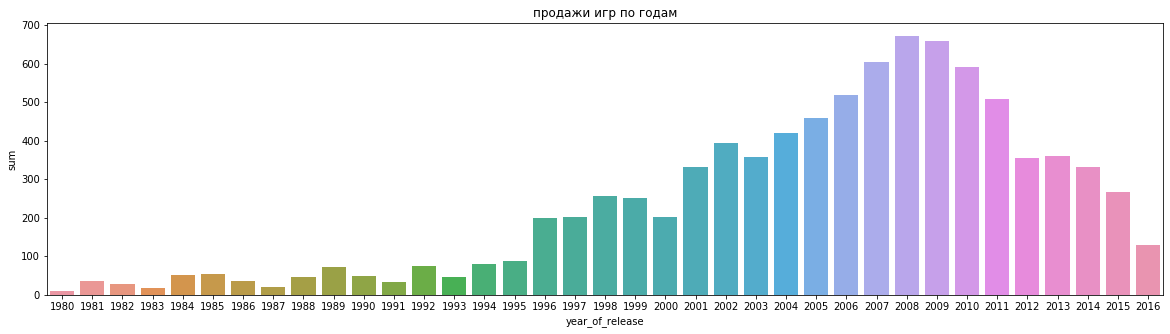

In [16]:
plt.figure(figsize=(20,5))
sns.barplot(x=grouped_year.index,y='sum', data = grouped_year).set_title('продажи игр по годам')

Похоже продажи игр коррелируют с их выпуском

In [17]:
# сформируем таблицу с продажами по годам:
platform_release = all_sales.pivot_table(index = 'platform', 
                                          columns = 'year_of_release',
                                          aggfunc = {'total_sales':'sum'}
                                           ).reset_index()
# избавимся от мультииндекса
platform_release.columns = platform_release.columns.droplevel(0)
platform_release = platform_release.rename(columns = {'':'platform'})

In [18]:
#определим платформы с наибольшими продажами, входящими в квантиль 75%, далее отбросим платформы до него
platform_sales = all_sales.pivot_table(index = 'platform', aggfunc = {'total_sales':'sum'}).sort_values(by='total_sales')
platform_sales.quantile(q=0.75)

total_sales    301.205
Name: 0.75, dtype: float64

In [19]:
# добудем список нужных платформ
top_platform = platform_sales.query('total_sales>=301').index

In [20]:
# теперь отсортируем таблицу platform_release по нужным нам платформам
top_platform_release = platform_release.query('platform in @top_platform')

In [21]:
top_platform_trans = top_platform_release.transpose()
top_platform_trans = top_platform_trans.rename(columns = top_platform_trans.loc['platform']).drop(index = 'platform')

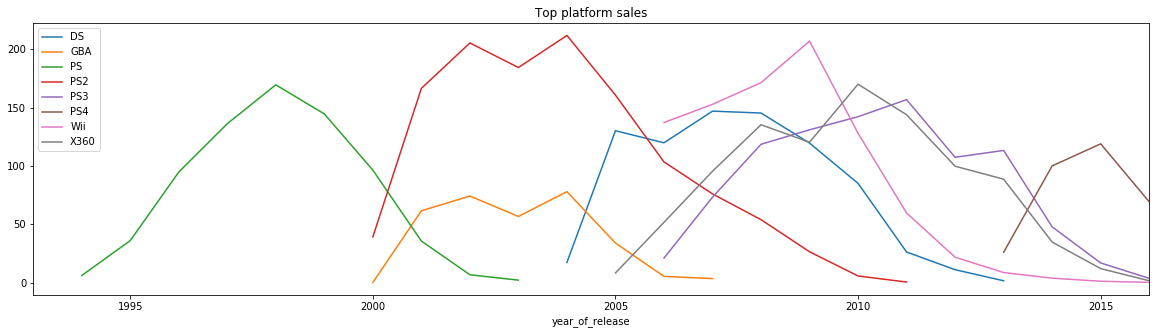

In [22]:
top_platform_trans.plot(figsize = (20,5),xlim=(1993,2016), title = 'Top platform sales')

Исходя из графика выше, средний срок жизни платформы составляет примерно 7-10 лет

In [23]:
# исходя из проведенного выше анализа, в итоговой выборке можно оставить топ платформы, 
# продажы по которым начались не позднее 10 лет назад, и имеют продажи в настоящее время

#определим платформы, игры на которые продаются сейчас:
actual_sales_platform = all_sales.query('year_of_release == 2016').platform.unique()


actual_sales = all_sales.query('year_of_release> 2005 and platform in @actual_sales_platform').reset_index().drop(columns='index')

In [24]:
actual_platform = actual_sales.pivot_table(index = 'platform', 
                                          columns = 'year_of_release',
                                          aggfunc = {'total_sales':'sum'}
                                           ).reset_index()
# избавимся от мультииндекса
actual_platform.columns = actual_platform.columns.droplevel(0)
actual_platform = actual_platform.rename(columns = {'':'platform'})

In [25]:
actual_platform = actual_platform.transpose()
actual_platform_sales = actual_platform.rename(columns = actual_platform.loc['platform']).drop(index = 'platform')

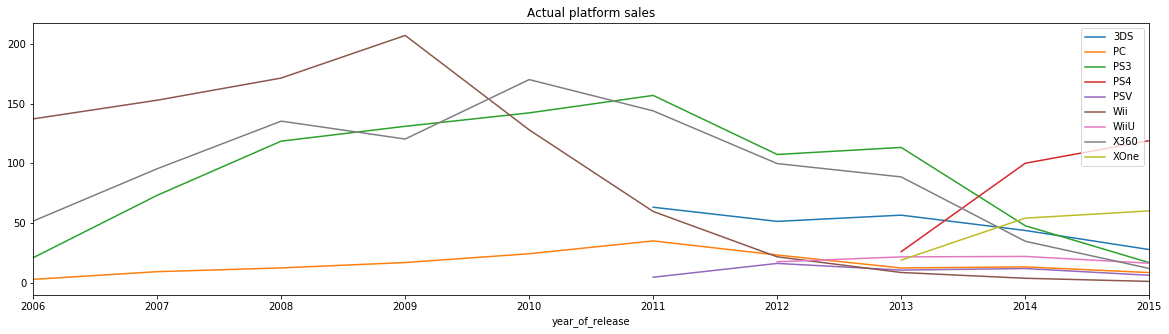

In [26]:
# ограничим график 2015 годом, так как похоже данные за 2016 год не за все месяцы
actual_platform_sales.plot(figsize = (20,5), title = 'Actual platform sales',xlim=(2006,2015))

Исходя из графика выше, к платформам набирающим популярность можно отнести PS4, XOne. Продажи остальных платформ снижаются.

<Figure size 1080x1080 with 0 Axes>

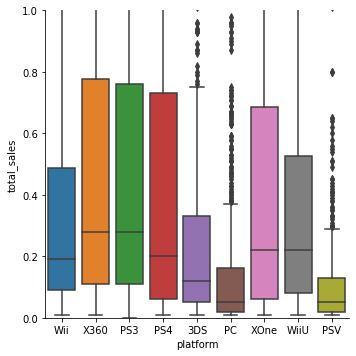

<Figure size 1080x1080 with 0 Axes>

In [27]:
#посмотрим на "ящик с усами"

sns.catplot(data = actual_sales[['platform','total_sales']], x='platform', y='total_sales', kind = 'box')
plt.ylim(0,1)
plt.figure(figsize=(15,15))

In [28]:
actual_sales[['platform','total_sales']].groupby('platform').describe()

total_sales                                                     
               count      mean       std   min   25%   50%     75%    max
platform                                                                 
3DS            512.0  0.503535  1.441271  0.01  0.05  0.12  0.3325  14.60
PC             776.0  0.210593  0.543686  0.01  0.02  0.05  0.1625   8.01
PS3           1306.0  0.713124  1.403065  0.00  0.11  0.28  0.7600  21.05
PS4            392.0  0.801378  1.609456  0.01  0.06  0.20  0.7300  14.63
PSV            429.0  0.125431  0.212341  0.01  0.02  0.05  0.1300   1.96
Wii           1286.0  0.692986  3.165022  0.01  0.09  0.19  0.4875  82.54
WiiU           147.0  0.559116  1.058836  0.01  0.08  0.22  0.5250   7.09
X360          1214.0  0.785000  1.642714  0.01  0.11  0.28  0.7775  21.82
XOne           247.0  0.645020  1.036139  0.01  0.06  0.22  0.6850   7.39

Исходя из диаграммы размаха и свода статистик, можно определить что в отрасли есть лидеры - PS3, X360, Wii и PC. При этом по средним продажам на игру лидирует PS4

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


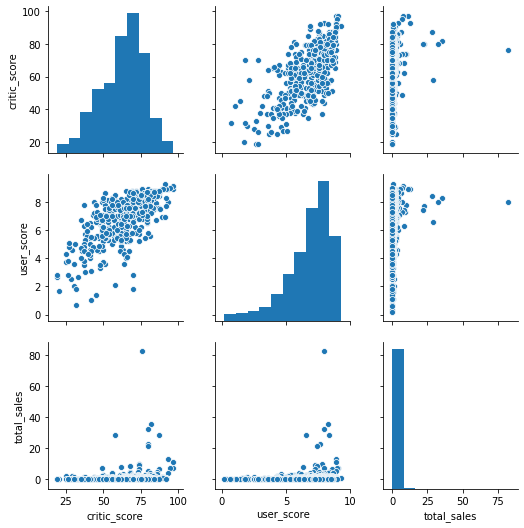

In [29]:
# посмотрим в рамках платформы Wii как на продажи влияют отзывы

wii = actual_sales.query('platform == "Wii"')[['critic_score','user_score', 'total_sales']]
sns.pairplot(wii)

In [30]:
#корреляция для Wii
wii.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.688285,0.177907
user_score,0.688285,1.000000,0.112831
total_sales,0.177907,0.112831,1.000000


судя по всему, есть достатоно высокая корреляция между оценками критиков и пользователей, при этом корреляция между продажами и оценками очень низкая, либо она не линейная.

In [31]:
# посмотрим корреляции для других платформ:
platforms = actual_sales['platform'].unique()
for plt in platforms:
    print('------------------------{}--------------------------'.format(plt))
    print(actual_sales.query('platform == @plt')[['critic_score','user_score', 'total_sales']].corr())

------------------------Wii--------------------------
              critic_score  user_score  total_sales
critic_score      1.000000    0.688285     0.177907
user_score        0.688285    1.000000     0.112831
total_sales       0.177907    0.112831     1.000000
------------------------X360--------------------------
              critic_score  user_score  total_sales
critic_score      1.000000    0.622629     0.396307
user_score        0.622629    1.000000     0.115762
total_sales       0.396307    0.115762     1.000000
------------------------PS3--------------------------
              critic_score  user_score  total_sales
critic_score      1.000000    0.631154     0.432759
user_score        0.631154    1.000000     0.128416
total_sales       0.432759    0.128416     1.000000
------------------------PS4--------------------------
              critic_score  user_score  total_sales
critic_score      1.000000    0.557654     0.406568
user_score        0.557654    1.000000    -0.031957
tot

Похоже, что ситуация с платфорной Wii не типична для других платформ, например корреляция между оценками критиков и продажами на PS3, PS4, X360, XOne имеют более высокую зависимость, при этом всё равно нельзя назвать её сильной.

In [32]:
actual_sales.groupby('genre')['total_sales'].aggregate(['sum','count','mean']).sort_values('mean',ascending = False)

,sum,count,mean
genre,,,
Shooter,681.11,627,1.086300
Platform,195.15,199,0.980653
Sports,659.43,855,0.771263
Racing,243.98,392,0.622398
Role-Playing,335.03,556,0.602572
Misc,391.11,674,0.580282
Fighting,142.01,245,0.579633
Action,892.38,1691,0.527723
Simulation,117.15,283,0.413958


Несмотря на то, что жанр Action имеет суммарно самые большие продажи, на одну игру в среднем приходится 527 тыс копий. В то же время, можно выделить Shooter, при больших объёмах продаж, средние продажи на одну игру превышают миллион копий. 
Среди непопулярных жанров можно выделить Puzzle, Strategy и Adventure. При том что выпускается достаточно бльшое количество игр в жанре Adventure, продажи их низки, что приносит в среднем 177 тыс копий на одну игру.

#### Шаг 4. Составим портрет пользователя каждого региона
Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5).
* Самые популярные жанры (топ-5).

In [33]:
# посмотрим на ТОП продаж платформ по регионам:

regions = ['na_sales', 'eu_sales', 'jp_sales']


for region in regions:
    total_sales = actual_sales[region].sum()
    print('---------------------{0}---------------------'.format(region,))
    result = actual_sales[['platform', region]].groupby('platform')[region].sum().sort_values(ascending = False).head()
    print(result)
    print( 'доля от общих продаж региона:' )
    print(result/total_sales*100)

---------------------na_sales---------------------
platform
X360    588.84
Wii     486.87
PS3     390.13
PS4     108.74
XOne     93.12
Name: na_sales, dtype: float64
доля от общих продаж региона:
platform
X360    31.909048
Wii     26.383327
PS3     21.141018
PS4      5.892585
XOne     5.046143
Name: na_sales, dtype: float64
---------------------eu_sales---------------------
platform
PS3     327.21
X360    267.89
Wii     258.32
PS4     141.09
PC      100.32
Name: eu_sales, dtype: float64
доля от общих продаж региона:
platform
PS3     26.263153
X360    21.501898
Wii     20.733773
PS4     11.324435
PC       8.052075
Name: eu_sales, dtype: float64
---------------------jp_sales---------------------
platform
3DS    100.62
PS3     79.41
Wii     68.28
PSV     21.84
PS4     15.96
Name: jp_sales, dtype: float64
доля от общих продаж региона:
platform
3DS    32.303840
PS3    25.494414
Wii    21.921151
PSV     7.011686
PS4     5.123924
Name: jp_sales, dtype: float64


Японский рынок существенно отличается от европейского и американского. 3DS тут на первом месте, в то время как в америке и европе не входит в топ. В Японии не входит в топ X360, в то время как в европе и США занимает первое и второе место

In [34]:
# посмотрим, какие предпочтения у игроков в зависимости от региона
for region in regions:
    print('---------------------{}---------------------'.format(region))
    print(actual_sales[['genre', region]].groupby('genre')[region].sum().sort_values(ascending = False).head())

---------------------na_sales---------------------
genre
Action          416.89
Shooter         352.17
Sports          336.40
Misc            217.19
Role-Playing    138.50
Name: na_sales, dtype: float64
---------------------eu_sales---------------------
genre
Action     300.70
Shooter    231.99
Sports     222.21
Misc       111.41
Racing      99.31
Name: eu_sales, dtype: float64
---------------------jp_sales---------------------
genre
Role-Playing    79.22
Action          73.01
Sports          31.14
Misc            26.26
Platform        22.58
Name: jp_sales, dtype: float64


Снова США и Европа схожи во вкусах, за исключением последней строки, в японии на первое место выходит РПГ, при этом шутеров в списке нет.
Нелюбовь к шутерам возможно можно объяснить непопулярностью платформы X, на которой выходит много игр этого жанра. А любовь к РПГ (скорее всего это ММОРПГ) возможно связана с одиночеством японцев, и в ММОРПГ они не чувствуют себя одиноко.

In [35]:
actual_sales.query('genre == "Shooter"').groupby('platform').count().genre.sort_values(ascending = False)

platform
X360    194
PS3     155
PC      117
Wii      61
PS4      41
XOne     38
WiiU     10
3DS       6
PSV       5
Name: genre, dtype: int64

In [36]:
actual_sales.query('genre == "Role-Playing"').groupby('platform').count().genre.sort_values(ascending = False)

platform
PS3     117
3DS      87
PSV      85
PC       85
X360     75
PS4      51
Wii      35
XOne     14
WiiU      7
Name: genre, dtype: int64

Гипотеза подтвердилась отчасти. Да, больше всего шутеров выходит на X360, но не мало и на PS3, которая занимает 2 строчку в Японии. В то же время, RPG больше всего выходит на PS3 и 3DS, которые в Японии занимают первые 2 места.

Но, возможно, нелюбовь к шутерам в пользу RPG это просто культурные особенности.

In [37]:
# посомтрим как на регоинальных продажах сказывается рейтинг
for region in regions:
    print('---------------------{}---------------------'.format(region))
    print(actual_sales[['rating', region]].groupby('rating')[region].sum().sort_values(ascending = False).head())

---------------------na_sales---------------------
rating
M       550.12
E       542.20
T       340.66
E10+    230.87
EC        0.71
Name: na_sales, dtype: float64
---------------------eu_sales---------------------
rating
M       387.46
E       353.24
T       205.32
E10+    134.02
RP        0.03
Name: eu_sales, dtype: float64
---------------------jp_sales---------------------
rating
E       78.81
T       53.38
M       39.63
E10+    13.58
RP       0.00
Name: jp_sales, dtype: float64


Распространённость рейтингов в принципе соответствует распространению жанров по регионам, популярным в США и Европе шутерам, скорее всего присвоен рейтинг М, а вот популярным RPG в Японии вероятнее всего рейтинг E.

#### Шаг 5. Проверим гипотезы
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action и Sports  разные.

In [38]:
#проверим гипотезу о схожести рейтингов для платформ Xbox One и PC
# гипотеза 0 - рейтинги одинаковые. H₀ всегда формулируется так, чтобы использовать знак равенства. 
# альтернативная гипотеза - рейтинги различаются
# уровень статистической значимости выберем равным 5%
# Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам,
# применим метод scipy.stats.ttest_ind

wo_nan_actual_sales = actual_sales.dropna(subset=['user_score'])

xone = wo_nan_actual_sales.query('platform == "XOne"')['user_score']
pc = wo_nan_actual_sales.query('platform == "PC" ')['user_score']
alpha = .05

results = st.ttest_ind(xone,pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.014354742043413306
Отвергаем нулевую гипотезу


In [39]:
wo_nan_actual_sales.query('platform == "XOne"')['user_score'].mean()

6.521428571428572

In [40]:
wo_nan_actual_sales.query('platform == "PC" ')['user_score'].mean()

6.830081300813008

Судя по всему, пользователи ставят разные оценки в зависимости от платформы, и для PC они в среднем выше.

In [41]:
# теперь проверим гипотезу о том,
# что пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные
# H0 - рейтинги равны
# H1 - рейтинги разные
# alpha = 5%


action = wo_nan_actual_sales.query('genre == "Action"')['user_score']
sports = wo_nan_actual_sales.query('genre == "Sports" ')['user_score']
alpha = .05

results = st.ttest_ind(action,sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.9769797369248167e-16
Отвергаем нулевую гипотезу


In [42]:
wo_nan_actual_sales.query('genre == "Action"')['user_score'].mean()

6.854730983302413

In [43]:
wo_nan_actual_sales.query('genre == "Sports" ')['user_score'].mean()

6.210666666666667

Похоже что оценки пользователей жанра Action не равны оценкам жанра Sports. Средняя говорит о том, что жанр Action оценивают выше.

#### Шаг 6. Общий вывод

Подводя итог можно сделать следующие выводы для продвижения продуктов на 2017 год:
* В последние годы набирают популярность новые платформы  PS4, XOne.
* Исходя из актуальных продаж популярных платформ, можно определить что в отрасли есть лидеры - PS3, X360, Wii и PC. При этом, по средним продажам на игру, лидирует PS4.
* Как оказалось, оценки критиков влияют по-разному на продажи на разных платформах, при этом корреляция всё равно достаточно низкая. Тут в рекламной компании можно было бы попробовать акцентировать внимание на оценках платформ Xbox и PS новый и старых поколений.
* ТОП 5 жанров по которым приходится больше всего продаж на одну игру: Shooter, Platform, Sports, Racing, Role-Playing.
* Игроки рынка Европы и Северной Америки между собой похожи, они любят платформы PS3, X360, Wii а среди жанров Экшн, Шутеры и Спорт. Для японского же рынка следует сосредоточится на RPG, для консолей: 3DS, PS3,  Wii.
* Стоит отметить, что игроки разных платформ могут оценивать игры по-разному. Справедливо, что и оценки жанров не схожи между собой.